**THIS IS NOT FINANCIAL ADVICE. DO YOUR OWN RESEARCH. USE AT YOUR OWN RISK.**

# Chapter 1: Prices

Based on [Analyzing Financial Data and Implementing Financial Models Using R](https://www.amazon.com/Analyzing-Financial-Implementing-Springer-Economics/dp/3030641546) by Clifford S. Ang (Springer), 1st edition. There's a 2nd edition but I don't have it.

We're using Python instead of R.

In [1]:
import pandas as pd
import pandas_ta as ta
import yfinance as yf

# Cache API calls
import requests_cache

# Standard plots
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Candlestick plots
import mplfinance as mpf

# In the blog post, I included the various prep and plot functions directly in the notebook itself.
# But I'm moved these to external scripts to avoid cluttering up the technical analysis with a
# bunch of code.
%run "ta/prepare_df.py"
%run "ta/plot_df.py"

## 1 Init tickers (yfinance)

See the yfinance [docs](https://aroussi.com/post/python-yahoo-finance) and [GitHub repo](https://github.com/ranaroussi/yfinance) for more information.

In [2]:
session = requests_cache.CachedSession("yfinance.cache")
session.headers["User-Agent"] = "prices-notebook/1.0"

In [3]:
# Indices
dji = yf.Ticker("^DJI", session=session)         # Dow Jones Industrial Average
gspc = yf.Ticker("^GSPC", session=session)       # S&P 500
ixic = yf.Ticker("^IXIC", session=session)       # NASDAQ Composite

# Equities
aapl = yf.Ticker("AAPL", session=session)        # Apple
amzn = yf.Ticker("AMZN", session=session)        # Amazon
fb = yf.Ticker("FB", session=session)            # Meta (Facebook)
goog = yf.Ticker("GOOG", session=session)        # Alphabet (Google)
msft = yf.Ticker("MSFT", session=session)        # Microsoft
tsla = yf.Ticker("TSLA", session=session)        # Tesla

# Cryptocurrency
btc_usd = yf.Ticker("BTC-USD", session=session)  # Bitcoin/USD

In [4]:
# We use unadjusted close prices, which exclude splits and cash flow yields
# (bond coupons, dividend/cap gains distributions). That way we can visualize
# pure capital gains. We have to pay attention to splits though.
def get_history(ticker, start="2021-01-01", end="2021-12-31"):
    return ticker.history(start=start, end=end, auto_adjust=False, back_adjust=False)

dji_df = get_history(dji)
gspc_df = get_history(gspc)
ixic_df = get_history(ixic)

aapl_df = get_history(aapl)
amzn_df = get_history(amzn)
fb_df = get_history(fb)
goog_df = get_history(goog)
msft_df = get_history(msft)
tsla_df = get_history(tsla)

btc_usd_df = get_history(btc_usd)

## 2 Plot data (mplfinance)

### 2.1 Candlestick (OHLC) charts 

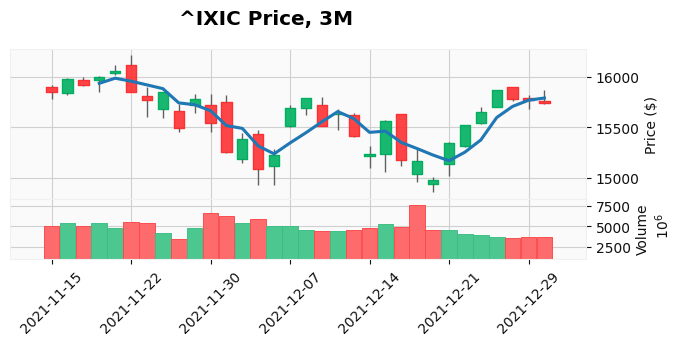

In [5]:
plot_candlestick(ixic_df, "^IXIC", "3M")

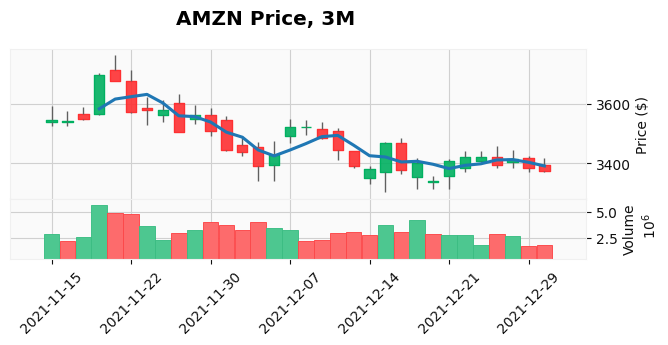

In [6]:
plot_candlestick(amzn_df, "AMZN", "3M")

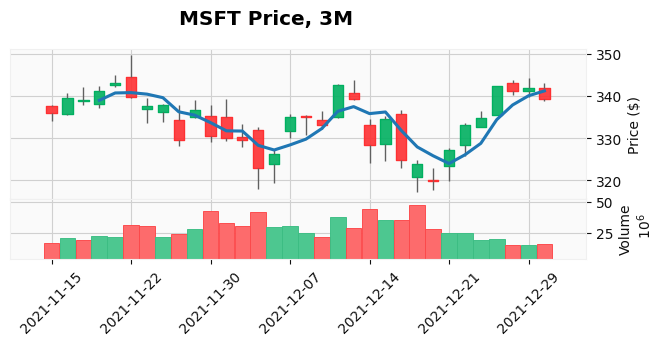

In [7]:
plot_candlestick(msft_df, "MSFT", "3M")

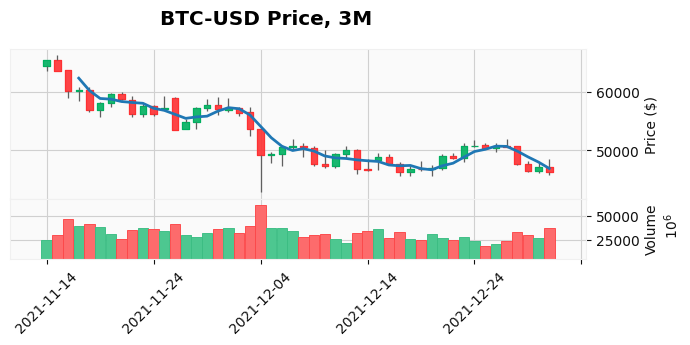

In [8]:
plot_candlestick(btc_usd_df, "BTC-USD", "3M")

### 2.2 Capital appreciation

That is, capital gains. As noted above, this excludes cash flow yields, which is why we are using
unadjusted closing prices.

In [9]:
comb_df = pd.DataFrame({
    "^IXIC": ixic_df["Close"],
    "AAPL": aapl_df["Close"],
    "AMZN": amzn_df["Close"],
    "FB": fb_df["Close"],
    "GOOG": goog_df["Close"],
    "MSFT": msft_df["Close"],
    "TSLA": tsla_df["Close"],
})
comb_df = comb_df["2021-10-01":"2021-12-31"]
comb_df.head()

,^IXIC,AAPL,AMZN,FB,GOOG,MSFT,TSLA
Date,,,,,,,
2021-10-01,14566.700195,142.649994,3283.260010,343.010010,2729.250000,289.100006,775.219971
2021-10-04,14255.480469,139.139999,3189.780029,326.230011,2675.300049,283.109985,781.530029
2021-10-05,14433.830078,141.110001,3221.000000,332.959991,2723.540039,288.760010,780.590027
2021-10-06,14501.910156,142.000000,3262.010010,333.640015,2747.080078,293.109985,782.750000
2021-10-07,14654.019531,143.289993,3302.429932,329.220001,2783.709961,294.850006,793.609985


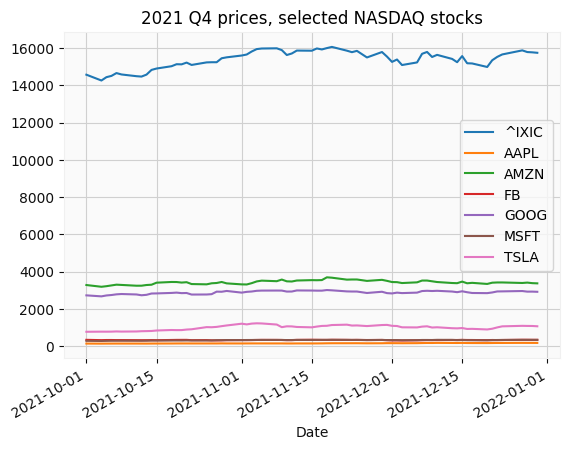

In [10]:
comb_df.plot(title="2021 Q4 prices, selected NASDAQ stocks")
plt.show()

In [11]:
# Normalize to show gains for $1
norm_df = comb_df.div(comb_df.iloc[0])
norm_df.head()

,^IXIC,AAPL,AMZN,FB,GOOG,MSFT,TSLA
Date,,,,,,,
2021-10-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-10-04,0.978635,0.975394,0.971528,0.951080,0.980233,0.979280,1.008140
2021-10-05,0.990879,0.989204,0.981037,0.970701,0.997908,0.998824,1.006927
2021-10-06,0.995552,0.995443,0.993528,0.972683,1.006533,1.013871,1.009713
2021-10-07,1.005994,1.004487,1.005839,0.959797,1.019954,1.019889,1.023722


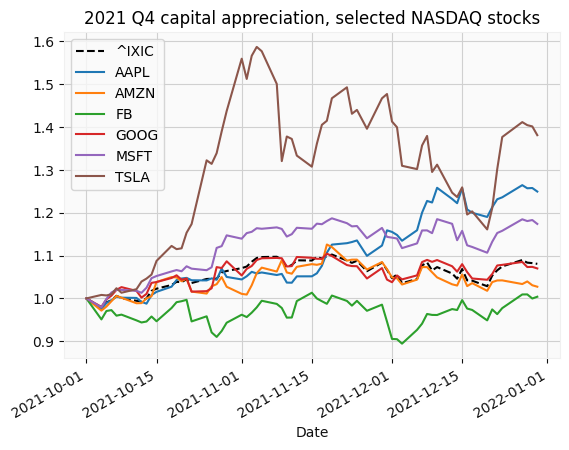

In [12]:
norm_df.plot(title="2021 Q4 capital appreciation, selected NASDAQ stocks", style=['k--'])
plt.show()

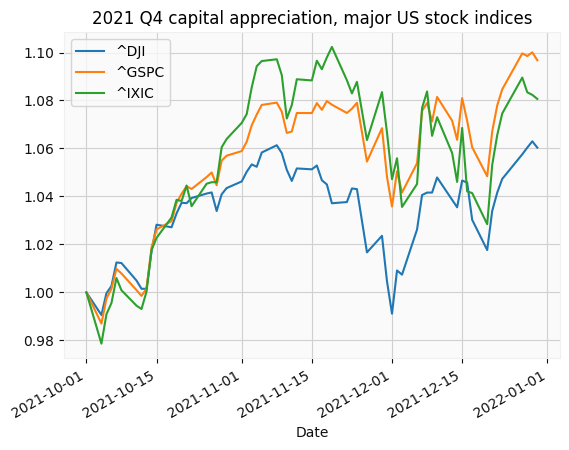

In [13]:
# Combine
comb2_df = pd.DataFrame({
    "^DJI": dji_df["Close"],
    "^GSPC": gspc_df["Close"],
    "^IXIC": ixic_df["Close"],
})
comb2_df = comb2_df["2021-10-01":"2021-12-31"]

# Normalize
norm2_df = comb2_df.div(comb2_df.iloc[0])
norm2_df.plot(title="2021 Q4 capital appreciation, major US stock indices")
plt.show()

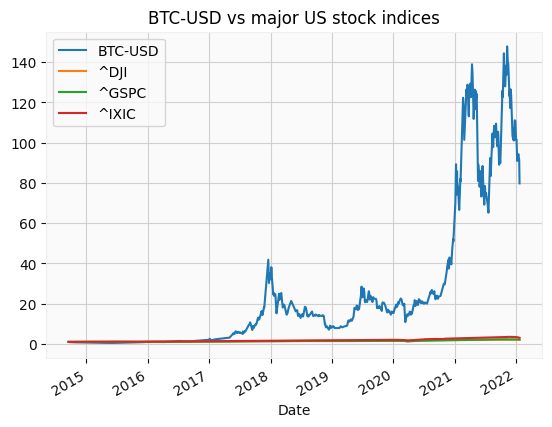

In [14]:
start3 = "2014-09-17"
end3 = "2022-01-23"

# Combine
comb3_df = pd.DataFrame({
    "BTC-USD": get_history(btc_usd, start3, end3)["Close"],
    "^DJI": get_history(dji, start3, end3)["Close"],
    "^GSPC": get_history(gspc, start3, end3)["Close"],
    "^IXIC": get_history(ixic, start3, end3)["Close"],
})

# Normalize
# Remove rows where stocks aren't trading. Bitcoin always trades,
# so we don't want to accidentally grab a row 0 NaN for normalizing.
comb3_df = comb3_df[
    (comb3_df["^DJI"].notnull()) &
    (comb3_df["^GSPC"].notnull()) &
    (comb3_df["^IXIC"].notnull()) &
    (comb3_df["BTC-USD"].notnull())
]

norm3_df = comb3_df.div(comb3_df.iloc[0])
norm3_df.plot(title="BTC-USD vs major US stock indices")
plt.show()

## 3 Technical analysis 

### 3.1 Trend: Simple Moving Average Crossover 

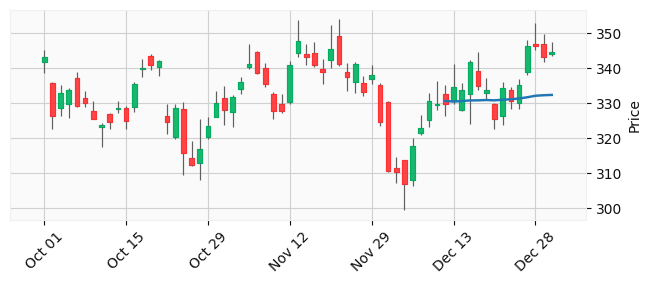

In [15]:
# Using mplfinance
df = fb_df["2021-10-01":"2021-12-31"]
mpf.plot(df, type="candle", mav=(50, 200), style="yahoo", figsize=(8, 3))

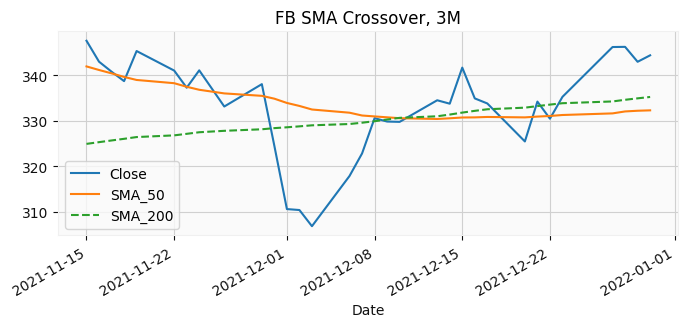

In [16]:
df = add_sma_crossover(fb_df)
plot_sma_crossover(df, "FB", "3M")

### 3.2 Volatility: Bollinger Bands

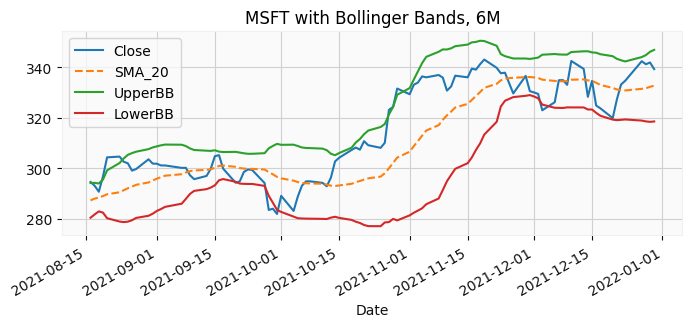

In [17]:
df = add_bollinger_bands(msft_df)
plot_bollinger(df, "MSFT", "6M")

### 3.3 Momentum: Relative Strength Index (RSI)

See [Relative Strength Index (RSI)](https://www.investopedia.com/terms/r/rsi.asp) (Investopedia).

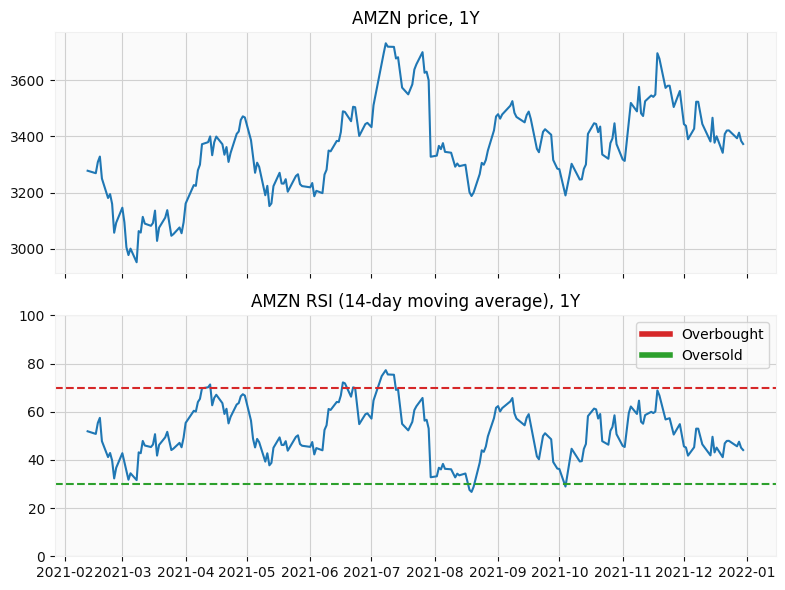

In [18]:
df = add_rsi(amzn_df)
plot_rsi(df, "AMZN", "1Y")

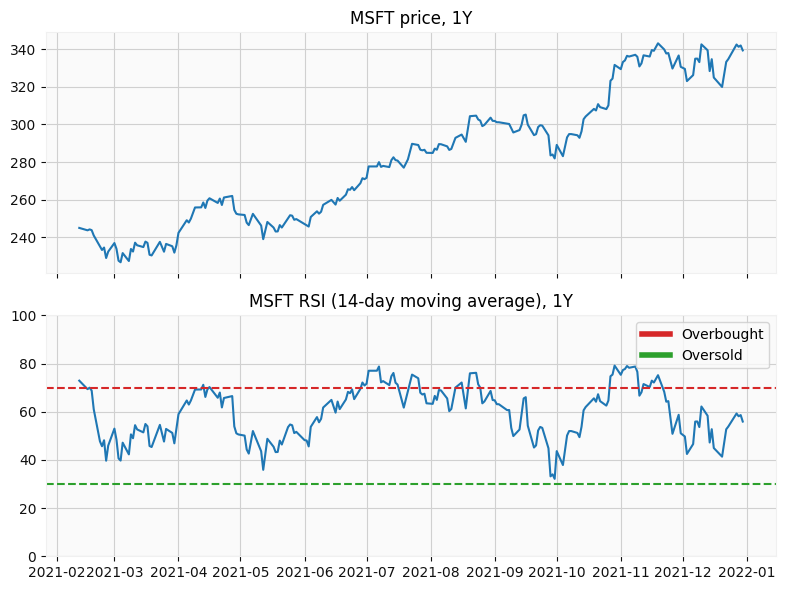

In [19]:
df = add_rsi(msft_df)
plot_rsi(df, "MSFT", "1Y")

### 3.4 Momentum: Moving Average Convergence Divergence (MACD)

See [Moving Average Convergence Divergence (MACD)](https://www.investopedia.com/terms/m/macd.asp) (Investopedia).

#### 3.4.1 By hand 

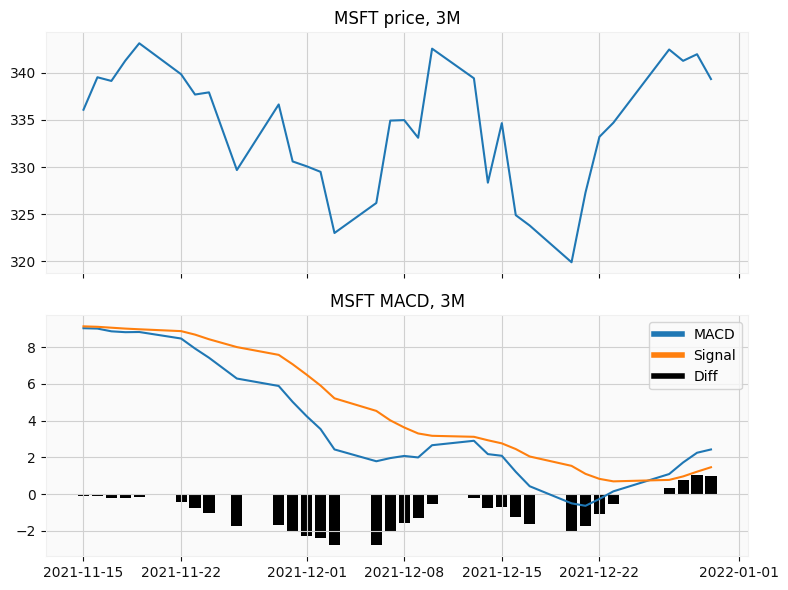

In [20]:
df = add_macd(msft_df)
plot_macd(df, "MSFT", "3M")

#### 3.4.2 Using pandas-ta 

In [21]:
msft_macd = msft_df.ta.macd(close="Close", fast=12, slow=26, signal=9, append=True)
msft_macd["Close"] = msft_df["Close"]
msft_macd.tail(10)

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,Close
Date,,,,
2021-12-16,1.218803,-1.238839,2.457642,324.899994
2021-12-17,0.433464,-1.619343,2.052806,323.799988
2021-12-20,-0.497083,-2.039911,1.542828,319.910004
2021-12-21,-0.631761,-1.739671,1.107911,327.290009
2021-12-22,-0.258624,-1.093228,0.834604,333.200012
2021-12-23,0.155526,-0.543262,0.698788,334.690002
2021-12-27,1.097262,0.318779,0.778483,342.450012
2021-12-28,1.726858,0.758700,0.968158,341.250000
2021-12-29,2.256293,1.030508,1.225785,341.950012


In [22]:
msft_macd.rename(columns={
    "MACD_12_26_9": "MACD",
    "MACDh_12_26_9": "MACD-h",
    "MACDs_12_26_9": "MACD-s",    
}, inplace=True)

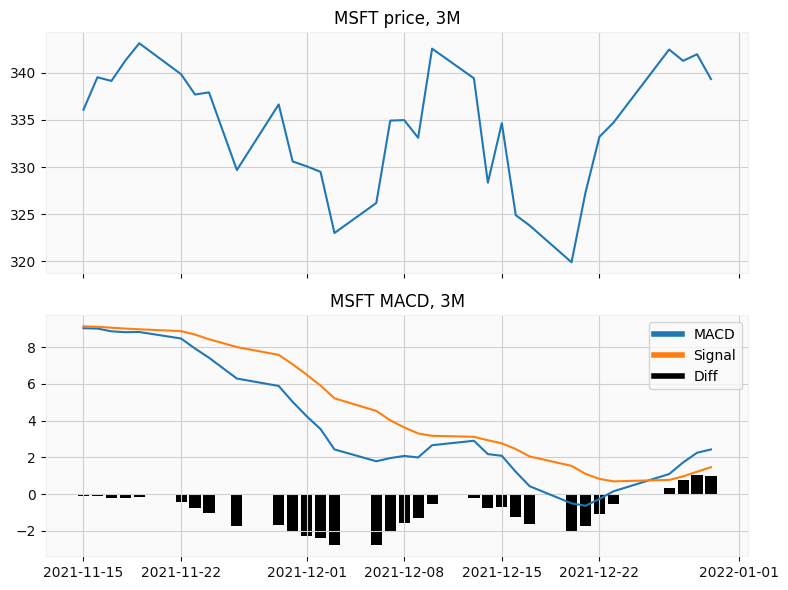

In [23]:
plot_macd(msft_macd, "MSFT", "3M")